<a href="https://colab.research.google.com/github/MBridenne/bnn/blob/master/yolov4/FIBEE_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
# verify CUDA
!/usr/local/cuda/bin/nvcc --version
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

Cloning into 'darknet'...
remote: Enumerating objects: 15054, done.
remote: Total 15054 (delta 0), reused 0 (delta 0), pack-reused 15054
Receiving objects: 100% (15054/15054), 13.40 MiB | 23.99 MiB/s, done.
Resolving deltas: 100% (10233/10233), done.
/content/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, cha

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

Uploading images from Google Drive

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 aaa_weights.zip    Collège   Lycée   'My Drive'   yolov4
'Colab Notebooks'   CS	      Maison   Prépa


In [ ]:
# cd back into the darknet folder to run detections
%cd darknet

/content/darknet


Personalizing YOLOv4

Moving the dataset into the cloud

In [ ]:
# this is where my datasets are stored within my Google Drive (I created a yolov4 folder to store all important files for custom training) 
!ls /mydrive/yolov4
# copy over both datasets into the root directory of the Colab VM (comment out test.zip if you are not using a validation dataset)
!cp /mydrive/yolov4/obj.zip ../
!cp /mydrive/yolov4/test.zip ../
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

backup		   generate_train.py  obj.names			test.zip
FIBEE-video.ipynb  images	      obj.zip			video
generate_test.py   obj.data	      repartition_aleatoire.py	yolov4-obj.cfg
Archive:  ../obj.zip
  inflating: data/obj/0_0_frame_30fps_003165.png  
  inflating: data/obj/0_0_frame_30fps_003165.txt  
  inflating: data/obj/0_0_frame_30fps_003180.png  
  inflating: data/obj/0_0_frame_30fps_003180.txt  
  inflating: data/obj/0_0_frame_30fps_003210.png  
  inflating: data/obj/0_0_frame_30fps_003210.txt  
  inflating: data/obj/0_0_frame_30fps_003225.png  
  inflating: data/obj/0_0_frame_30fps_003225.txt  
  inflating: data/obj/0_0_frame_30fps_003240.png  
  inflating: data/obj/0_0_frame_30fps_003240.txt  
  inflating: data/obj/0_0_frame_30fps_003255.png  
  inflating: data/obj/0_0_frame_30fps_003255.txt  
  inflating: data/obj/0_0_frame_30fps_003270.png  
  inflating: data/obj/0_0_frame_30fps_003270.txt  
  inflating: data/obj/0_0_frame_30fps_003300.png  
  inflating: data/obj/0_0_frame_30fps_003

Configuring files for training

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive 
#warning: may replace manually yolov4-cfg in the darknet repository: upload modified yolov4-cfg, delete  yolov4-cfg in darknet/.cgf and put the modified yolov4-cfg
!cp /mydrive/yolov4/yolov4-obj.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4/obj.names ./data
!cp /mydrive/yolov4/obj.data  ./data

In [ ]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov4/generate_train.py ./
!cp /mydrive/yolov4/generate_test.py ./
!python generate_train.py
!python generate_test.py
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


Training from last saved

In [ ]:
 #kick off training from where it last saved
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.769716), count: 13, class_loss = 3.559230, iou_loss = 33.222179, total_loss = 36.781410 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000150, iou_loss = 0.000000, total_loss = 0.000150 
 total_bbox = 1151923, rewritten_bbox = 0.050698 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.047922, iou_loss = 0.000000, total_loss = 0.047922 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.863136), count: 6, class_loss = 1.128274, iou_loss = 8.503457, total_loss = 9.631731 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.735804), count: 2, class_loss = 0.356853, iou_loss = 0.572166, total_loss = 0.929019 
 total_bbox = 1151931,

Graph

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

AttributeError: ignored

Calculating Mean average precision

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_1000.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

Make predictions

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

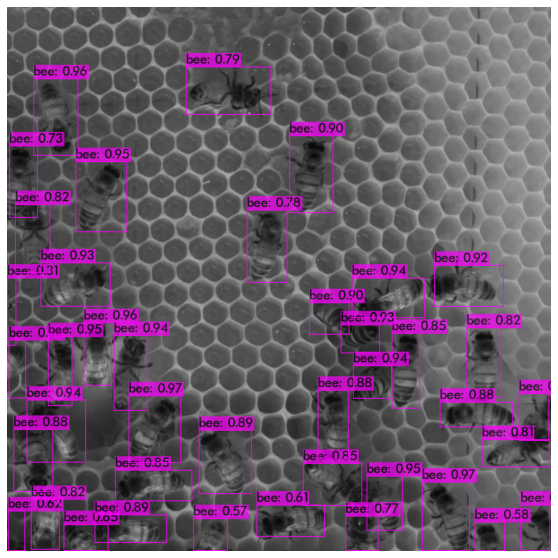

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights /mydrive/yolov4/images/3_1_frame_30fps_003795.png #-thresh 0.3
imShow('predictions.jpg')

Analyse de vidéo

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov4-obj.cfg /content/drive/MyDrive/yolov4/backup/yolov4-obj_last.weights  /content/drive/MyDrive/yolov4/video/3-3-frame-30fps-003135_TT7hFzuX_E3od.mp4 -i 0 -out_filename /content/drive/MyDrive/yolov4/video/resultsdense.avi -dont_show -map --count

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Objects:

bee: 89% 
bee: 89% 
bee: 89% 
bee: 88% 
bee: 88% 
bee: 88% 
bee: 87% 
bee: 87% 
bee: 86% 
bee: 85% 
bee: 84% 
bee: 84% 
bee: 84% 
bee: 84% 
bee: 83% 
bee: 80% 
bee: 80% 
bee: 79% 
bee: 79% 
bee: 79% 
bee: 77% 
bee: 75% 
bee: 74% 
bee: 72% 
bee: 69% 
bee: 69% 
bee: 67% 
bee: 67% 
bee: 66% 
bee: 65% 
bee: 65% 
bee: 65% 
bee: 64% 
bee: 63% 
bee: 63% 
bee: 63% 
bee: 62% 
bee: 59% 
bee: 58% 
bee: 55% 
bee: 55% 
bee: 55% 
bee: 54% 
bee: 53% 
bee: 52% 
bee: 52% 
bee: 52% 
bee: 52% 
bee: 48% 
bee: 44% 
bee: 44% 
bee: 44% 
bee: 44% 
bee: 43% 
bee: 42% 
bee: 41% 
bee: 40% 
bee: 40% 
bee: 37% 
bee: 36% 
bee: 35% 
bee: 34% 
bee: 33% 
bee: 32% 
bee: 32% 
bee: 30% 
bee: 30% 
bee: 29% 
bee: 29% 
bee: 29% 
bee: 29% 
bee: 28% 
bee: 25% 
bee: 25% 

FPS:10.3 	 AVG_FPS:9.2

 cvWriteFrame 
Objects:

bee: 89% 
bee: 89% 
bee: 89% 
bee: 88% 
bee: 88% 
bee: 88% 
bee: 87% 
bee: 86% 
bee: 86% 
bee: 86% 
bee: 84% 
bee: 84% 
be